## The image is uploaded on googel drive as "Sample image.jpg"
### this section is for connection to googel drive and read the image

## connecting to google colab

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing The needed libraries

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import drive


## Reading The image

In [19]:
image_path = '/content/drive/MyDrive/Low_pass_filter/sample_image.jpg'
f = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
M, N = f.shape

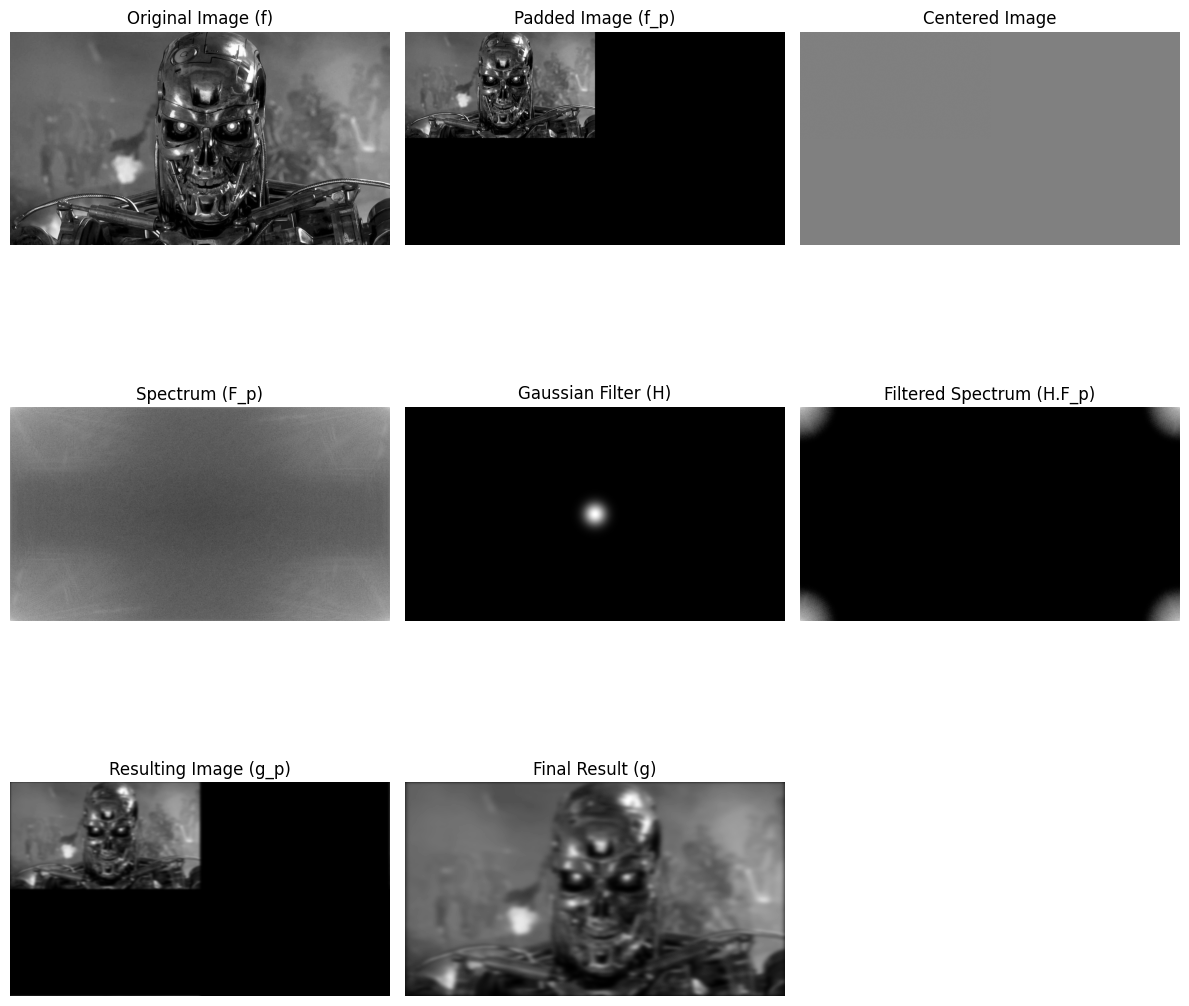

In [20]:
# Step (b): Pad the image to size P x Q
P = 2 * M
Q = 2 * N
f_p = np.zeros((P, Q))
f_p[:M, :N] = f

# Step (c): Multiply by (-1)^(x+y)
x = np.arange(P).reshape(P, 1)
y = np.arange(Q).reshape(1, Q)
multiplier = (-1) ** (x + y)
f_p_centered = f_p * multiplier

# Step (d): Compute the DFT
F_p = np.fft.fft2(f_p_centered)

# Step (e): Create Gaussian lowpass filter
u = np.arange(P).reshape(P, 1)
v = np.arange(Q).reshape(1, Q)
D = np.sqrt((u - P / 2) ** 2 + (v - Q / 2) ** 2)
sigma = 50  # Adjust sigma for different cut-off frequencies
H = np.exp(-(D ** 2) / (2 * sigma ** 2))

# Step (f): Apply the filter
H_F_p = H * F_p

# Step (g): Compute the inverse DFT
g_p_centered = np.fft.ifft2(H_F_p)
g_p = np.real(g_p_centered) * multiplier

# Step (h): Crop to original size
g = g_p[:M, :N]

# Visualization
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.title('Original Image (f)')
plt.imshow(f, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('Padded Image (f_p)')
plt.imshow(f_p, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Centered Image')
plt.imshow(f_p_centered, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('Spectrum (F_p)')
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(F_p))), cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Gaussian Filter (H)')
plt.imshow(H, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Filtered Spectrum (H.F_p)')
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(H_F_p))), cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Resulting Image (g_p)')
plt.imshow(g_p, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title('Final Result (g)')
plt.imshow(g, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()